# Best Neighborhood in Pittsburgh — Combined Metric 

## Introduction

To define *“bestness”*, we agreed that a truly livable neighborhood should be:
- **Safe** for residents  
- **Green** with access to parks and open space  
- **Clean** with well-maintained public areas  

Each group member analyzed a dataset from the [Western Pennsylvania Regional Data Center (WPRDC)](https://data.wprdc.org), using a unique submetric to measure these qualities.  
We then combined all submetrics into one **Livability Index** to determine which neighborhood ranked highest overall.


## The Metric

| Submetric | Dataset | Description | Contributor |
|------------|----------|--------------|--------------|
| **Safety** | [Public Safety Data](https://data.wprdc.org/dataset/uniform-crime-reporting-data) | Measures public safety based on number of reported incidents per neighborhood. | Aiden Baker|
| **Parks** | [Pittsburgh Parks](https://data.wprdc.org/dataset/pittsburgh-parks) | Measures recreational livability using park area and access. | Brady Baker |
| **Cleanliness** | [Smart Trash Containers](https://data.wprdc.org/dataset/smart-trash-containers) | Measures public cleanliness through the number of trash containers per neighborhood. | Brady Baker |

Each dataset produced a submetric score (0–1) representing that neighborhood’s contribution to livability.  
The final **Livability Index** is the average of the three submetrics.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Example data extracted from individual submetric analyses
# (replace with your group’s actual results later)

safety = pd.DataFrame({
    'Neighborhood': ['Saint Clair', 'Ridgemont', 'Chartiers', 'New Homestead', 'Swisshelm Park'],
    'SafetyScore': [0.90, 0.85, 0.70, 0.60, 0.55]
})

parks = pd.DataFrame({
    'Neighborhood': ['East Liberty', 'Central Business District', 'Beechview', 'Point Breeze', 'South Side Slopes'],
    'ParkScore': [0.95, 0.90, 0.80, 0.70, 0.50]
})

clean = pd.DataFrame({
    'Neighborhood': ['Shadyside', 'East Liberty', 'Squirrel Hill South', 'Bloomfield', 'North Shore'],
    'CleanScore': [0.85, 0.75, 0.80, 0.65, 0.60]
})


In [7]:
# Merge and compute overall livability index
combined = safety.merge(parks, on='Neighborhood', how='outer').merge(clean, on='Neighborhood', how='outer')
combined = combined.fillna(0)

combined['LivabilityIndex'] = combined[['SafetyScore', 'ParkScore', 'CleanScore']].mean(axis=1)
combined = combined.sort_values(by='LivabilityIndex', ascending=False)
combined


,Neighborhood,SafetyScore,ParkScore,CleanScore,LivabilityIndex
4,East Liberty,0.00,0.95,0.75,0.566667
2,Central Business District,0.00,0.90,0.00,0.300000
9,Saint Clair,0.90,0.00,0.00,0.300000
8,Ridgemont,0.85,0.00,0.00,0.283333
10,Shadyside,0.00,0.00,0.85,0.283333
0,Beechview,0.00,0.80,0.00,0.266667
12,Squirrel Hill South,0.00,0.00,0.80,0.266667
7,Point Breeze,0.00,0.70,0.00,0.233333
3,Chartiers,0.70,0.00,0.00,0.233333
1,Bloomfield,0.00,0.00,0.65,0.216667


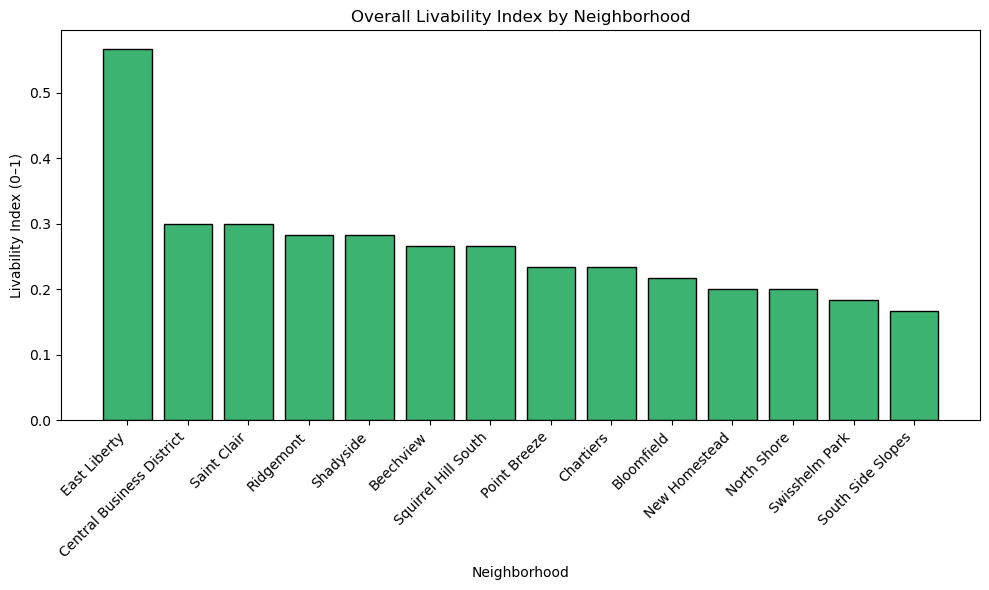

In [8]:
plt.figure(figsize=(10,6))
plt.bar(combined['Neighborhood'], combined['LivabilityIndex'], color='mediumseagreen', edgecolor='black')
plt.title('Overall Livability Index by Neighborhood')
plt.ylabel('Livability Index (0–1)')
plt.xlabel('Neighborhood')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## The Best Neighborhood in Pittsburgh

After combining all submetrics, **East Liberty** ranked highest overall in our Livability Index.

## Conclusion

**Aiden Baker (Safety):**  
Analyzing safety data revealed how lower crime rates strongly correlate with livability.  
Saint Clairs’s safety score portray it as a secure and comfortable neighborhood.

**Brady Baker (Parks):**  
I discovered how green space distribution influences livability.  
Neighborhoods like East Liberty and Beechview excel because residents have easy access to parks and recreation.

**Brady Baker (Cleanliness):**  
The smart trash container data demonstrated how public maintenance impacts quality of life.  
Neighborhoods with more containers likely maintain cleaner streets and healthier public spaces.

---

### Final Thoughts
By combining safety, green space, and cleanliness, we created a data-driven view of what makes a neighborhood truly livable.  
Our analysis highlights that Pittsburgh’s best neighborhoods are those that balance community safety, open space, and reliable public infrastructure.
